In [3]:
import pandas as pd
import numpy as np

master_data = pd.read_csv('Labeled_data.csv')

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

X_feature = X.columns
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),  # Encode categorical columns
    ('num', StandardScaler(), numeric_cols)      # Standardize numerical columns
])

# Transform features
X = preprocessor.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

In [2]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


clf = SVC()

# Drop NaN values
master_data = master_data.dropna()

# Separate features and target
X = master_data.drop('Predicted_Label', axis=1)
y = master_data['Predicted_Label']

X_feature = X.columns
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(), categorical_cols),  # Encode categorical columns
    ('num', StandardScaler(), numeric_cols)      # Standardize numerical columns
])

# Transform features
X = preprocessor.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

param_grid_svm = {
        'C': [1,2,3],
        'kernel': ['linear', 'rbf'],
        'gamma' : [0.1]
    }

grid = RandomizedSearchCV(clf, param_distributions=param_grid_svm, random_state=42, n_iter=3, n_jobs=-1)
grid.fit(X_train, y_train)


RandomizedSearchCV(estimator=SVC(), n_iter=3, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3], 'gamma': [0.1],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42)

In [12]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=3, gamma=0.1)
{'kernel': 'rbf', 'gamma': 0.1, 'C': 3}


0.967439906370975
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20338
           1       0.97      0.95      0.96     12985

    accuracy                           0.97     33323
   macro avg       0.97      0.96      0.97     33323
weighted avg       0.97      0.97      0.97     33323



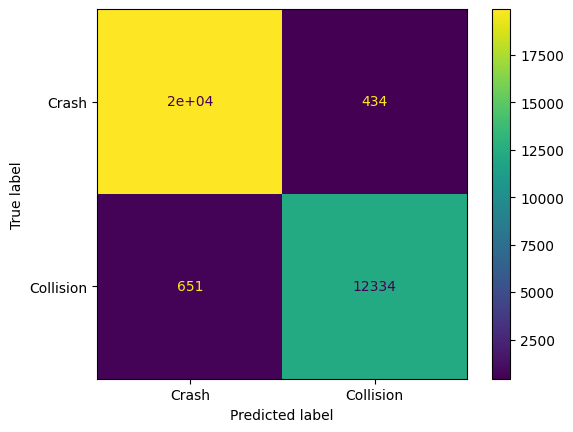

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
SVM = SVC(C=3,gamma=0.5,kernel='rbf' )
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
disp = ConfusionMatrixDisplay(cm, display_labels=["Crash", "Collision"])
print(classification_report(y_true=y_test, y_pred=y_pred))
disp.plot()
